In [132]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
DATA_PATH = "data/"

In [69]:
n_samples = 500
X,y = make_blobs(n_samples=n_samples, random_state=24)

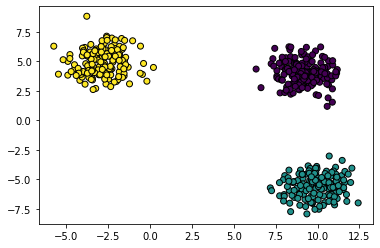

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

In [212]:
toy_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
toy_dataset

array([[ 7.33236577,  5.22098509,  0.        ],
       [ 9.03352616, -6.20471619,  1.        ],
       [12.04916656, -4.05034355,  1.        ],
       ...,
       [ 9.23275512,  3.740663  ,  0.        ],
       [-2.56164625,  6.77825299,  2.        ],
       [-3.48117834,  4.17511772,  2.        ]])

In [213]:
# If you wish to save numpy array: 
# np.savetxt(DATA_PATH+"toy_dataset.csv", toy_dataset, delimiter=",", fmt='%f')

## Init dataset


As it is implemented currently the points in init_toy_dataset are duplicated of points in toy_dataset.

In [214]:
import pandas as pd

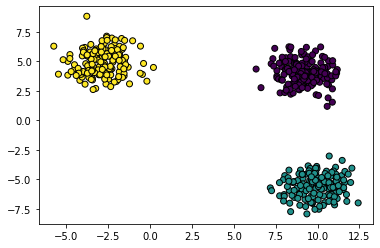

In [216]:
# We have these blobs 
plt.scatter(toy_dataset[:, 0], toy_dataset[:, 1], c=y, edgecolor='k')

In [217]:
# We need a smaller subset of representative points from each blob to use for init DBSCAN
df = pd.DataFrame(toy_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
df.head()

,x-coord,y-coord,label
0,7.332366,5.220985,0
1,9.033526,-6.204716,1
2,12.049167,-4.050344,1
3,-3.894698,6.174465,2
4,7.863410,4.553102,0


In [218]:
# get 50 sample points from each cluster
clu0_pts = df[df['label'] == 0].sample(50, random_state=42)
clu1_pts = df[df['label'] == 1].sample(50, random_state=42)
clu2_pts = df[df['label'] == 2].sample(50, random_state=42)
# .sample(fram=1) is equiv to shuffle as we're sampling without replacement
init_toy_dataset = pd.concat([clu0_pts,clu1_pts,clu2_pts]).sample(frac=1, random_state=42)
init_toy_dataset.head()

,x-coord,y-coord,label
34,10.833205,-5.741275,1
490,11.084873,4.110865,0
306,-2.348644,3.853045,2
176,7.178881,-5.722282,1
417,10.922630,-5.681874,1


In [219]:
# save toy dataset and the init points
df.to_csv(DATA_PATH+"toy_dataset.csv",index=False, header=False)
init_toy_dataset.to_csv(DATA_PATH+"init_toy_dataset.csv",index=False, header=False)